In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
def sobel_edge_detection(image_path):
    """
    Implement edge detection using Sobel operator
    
    Args:
        image_path (str): Path to the input image
    
    Returns:
        tuple: (original_image, edge_map)
    """
    
    # Read the image
    print(f"Reading image from: {image_path}")
    image = cv2.imread(image_path)
    
    if image is None:
        raise ValueError(f"Could not read image from {image_path}")
    
    # Convert to grayscale if needed
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        print("Image converted to grayscale")
    else:
        gray = image.copy()
        print("Image is already grayscale")
    
    # Apply Sobel operator in both X and Y directions
    print("Applying Sobel operator...")
    
    # Sobel kernels
    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]], dtype=np.float32)
    
    sobel_y = np.array([[-1, -2, -1],
                        [ 0,  0,  0],
                        [ 1,  2,  1]], dtype=np.float32)
    
    # Apply Sobel filters
    grad_x = cv2.filter2D(gray, cv2.CV_32F, sobel_x)
    grad_y = cv2.filter2D(gray, cv2.CV_32F, sobel_y)
    
    # Combine gradient magnitudes to create final edge map
    # Calculate magnitude of gradients
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    
    # Normalize to 0-255 range
    edge_map = np.uint8(255 * magnitude / np.max(magnitude))
    
    print("Edge detection completed successfully!")
    
    return image, gray, grad_x, grad_y, edge_map

In [3]:
def display_results(original, gray, grad_x, grad_y, edge_map):
    """
    Display original and edge map images side by side
    
    Args:
        original: Original color image
        gray: Grayscale image
        grad_x: X-direction gradients
        grad_y: Y-direction gradients  
        edge_map: Final edge map
    """

    plt.figure(figsize=(15, 10))
    
    # Original image
    plt.subplot(2, 3, 1)
    if len(original.shape) == 3:
        plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    # Grayscale image
    plt.subplot(2, 3, 2)
    plt.imshow(gray, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')
    
    # X-direction gradients
    plt.subplot(2, 3, 3)
    plt.imshow(grad_x, cmap='gray')
    plt.title('Sobel X (Vertical Edges)')
    plt.axis('off')
    
    # Y-direction gradients
    plt.subplot(2, 3, 4)
    plt.imshow(grad_y, cmap='gray')
    plt.title('Sobel Y (Horizontal Edges)')
    plt.axis('off')
    
    # Final edge map
    plt.subplot(2, 3, 5)
    plt.imshow(edge_map, cmap='gray')
    plt.title('Final Edge Map')
    plt.axis('off')


In [4]:
def save_edge_map(edge_map, output_path='edges_output.png'):
    """
    Save the edge map to file
    
    Args:
        edge_map: Edge detection result
        output_path: Output file path
    """
    success = cv2.imwrite(output_path, edge_map)
    if success:
        print(f"Edge map saved to: {output_path}")
    else:
        print(f"Failed to save edge map to: {output_path}")

In [5]:
def batch_process_images(folder_path, max_images=10):
    """
    Process multiple images in a folder
    
    Args:
        folder_path (str): Path to folder containing images
        max_images (int): Maximum number of images to process
    """
    folder = Path(folder_path)
    if not folder.exists():
        print(f"Folder not found: {folder_path}")
        return
    
    # Supported image extensions
    image_extensions = ['.jpg', '.jpeg', '.png']
    
    # Find all image files
    image_files = []
    for ext in image_extensions:
        image_files.extend(folder.glob(f'*{ext}'))
        image_files.extend(folder.glob(f'*{ext.upper()}'))
    
    if not image_files:
        print(f"No image files found in: {folder_path}")
        return
    
    # Create output directory
    output_dir = folder / 'edge_results'
    output_dir.mkdir(exist_ok=True)
    
    # Process images
    processed_count = 0
    for image_file in image_files[:max_images]:
        try:
            print(f"\nProcessing: {image_file.name}")
            
            # Perform edge detection
            original, gray, grad_x, grad_y, edge_map = sobel_edge_detection(str(image_file))
            
            # Save edge map
            output_path = output_dir / f"edges_{image_file.stem}.png"
            save_edge_map(edge_map, str(output_path))
        
            #display result for every processed image
            display_results(original, gray, grad_x, grad_y, edge_map)
            
            # Print statistics
            print(f"Edge pixels: {np.count_nonzero(edge_map)}")
            print(f"Edge density: {np.count_nonzero(edge_map) / edge_map.size * 100:.2f}%")
            
            processed_count += 1
            
        except Exception as e:
            print(f"Error processing {image_file.name}: {e}")
    
    print(f"\nProcessed {processed_count} images successfully!")
    print(f"Results saved in: {output_dir}")


In [6]:
def main():
    """
    Main function to run the edge detection
    """
    print("****** Sobel Edge Detection Implementation ******\n")
    
    # Your folder path
    folder_path = "D:/archive/images/train"
    
    path = Path(folder_path)
    
    if path.is_dir():
        # debugging
        print(f"Processing folder: {folder_path}")
        batch_process_images(folder_path)
    elif path.is_file():
        # debugging
        print(f"Processing single image: {folder_path}")
        try:
            # Perform edge detection on single image
            original, gray, grad_x, grad_y, edge_map = sobel_edge_detection(folder_path)
            
            # Display results
            display_results(original, gray, grad_x, grad_y, edge_map)
            
            # Save edge map
            save_edge_map(edge_map)
            
            print(f"\nImage Statistics:")
            print(f"Original image shape: {original.shape}")
            print(f"Edge map shape: {edge_map.shape}")

        except Exception as e:
            print(f"Error: {e}")
    else:
        pass

****** Sobel Edge Detection Implementation ******

Processing folder: D:/archive/images/train

Processing: 100075.jpg
Reading image from: D:\archive\images\train\100075.jpg
Image converted to grayscale
Applying Sobel operator...
Edge detection completed successfully!
Edge map saved to: D:\archive\images\train\edge_results\edges_100075.png
Edge pixels: 153359
Edge density: 99.33%

Processing: 100080.jpg
Reading image from: D:\archive\images\train\100080.jpg
Image converted to grayscale
Applying Sobel operator...
Edge detection completed successfully!
Edge map saved to: D:\archive\images\train\edge_results\edges_100080.png
Edge pixels: 145526
Edge density: 94.25%

Processing: 100098.jpg
Reading image from: D:\archive\images\train\100098.jpg
Image converted to grayscale
Applying Sobel operator...
Edge detection completed successfully!
Edge map saved to: D:\archive\images\train\edge_results\edges_100098.png
Edge pixels: 147722
Edge density: 95.67%

Processing: 103041.jpg
Reading image from

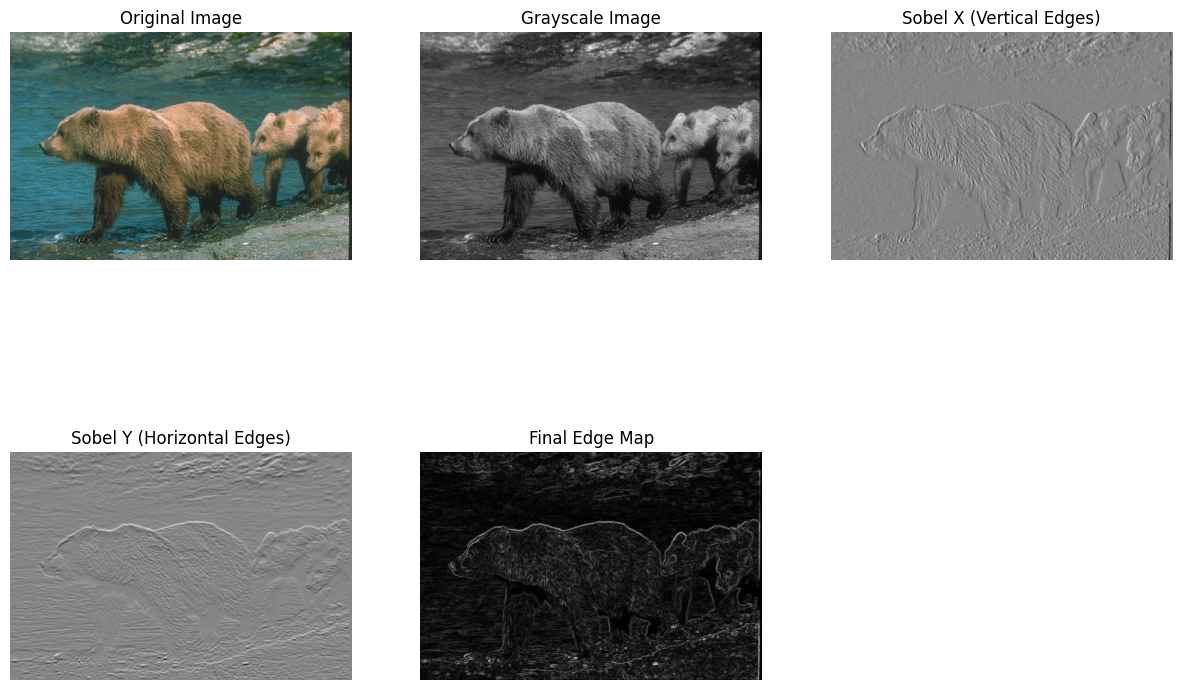

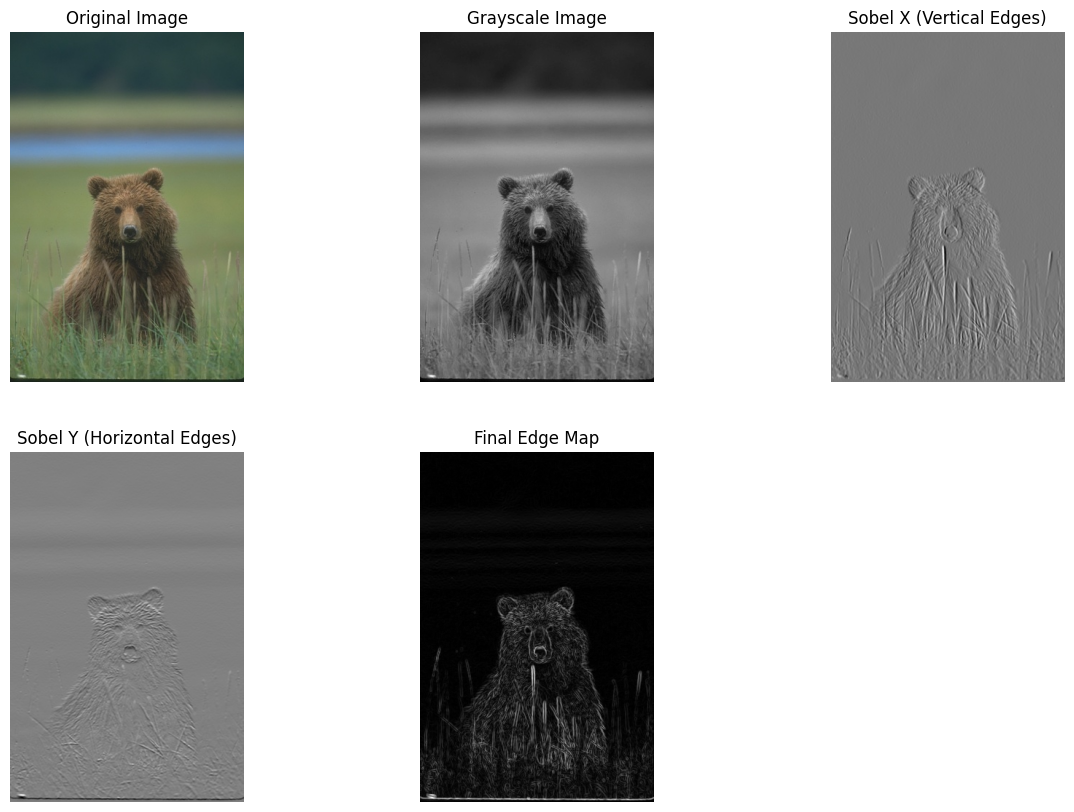

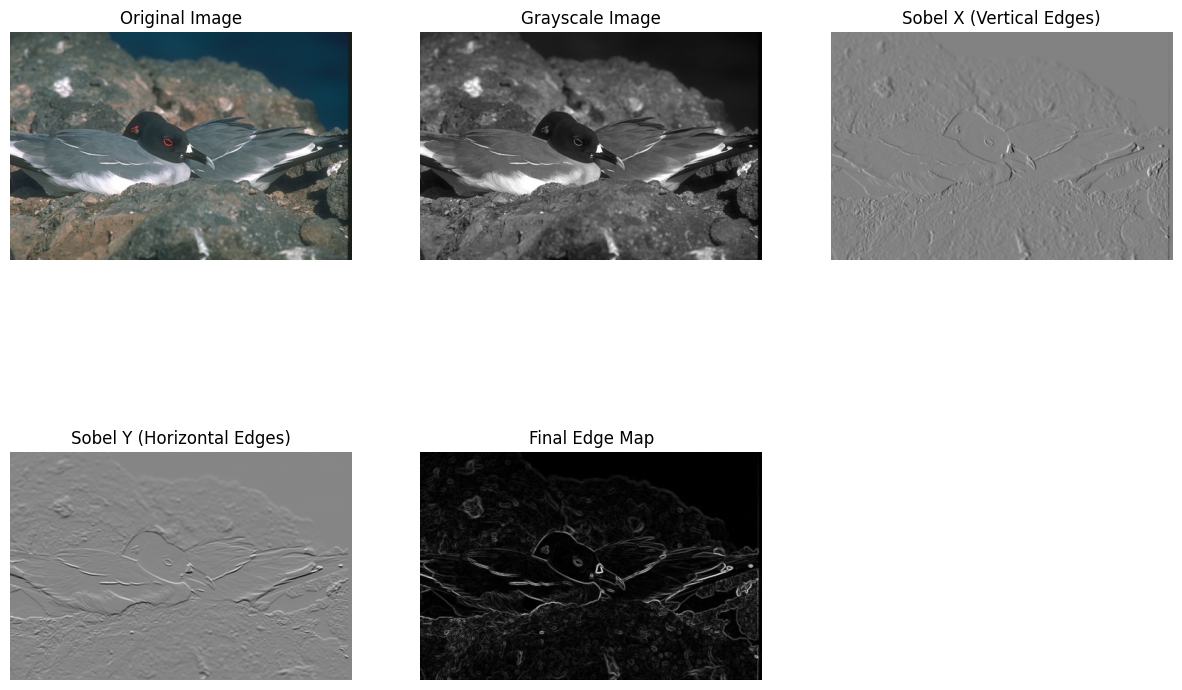

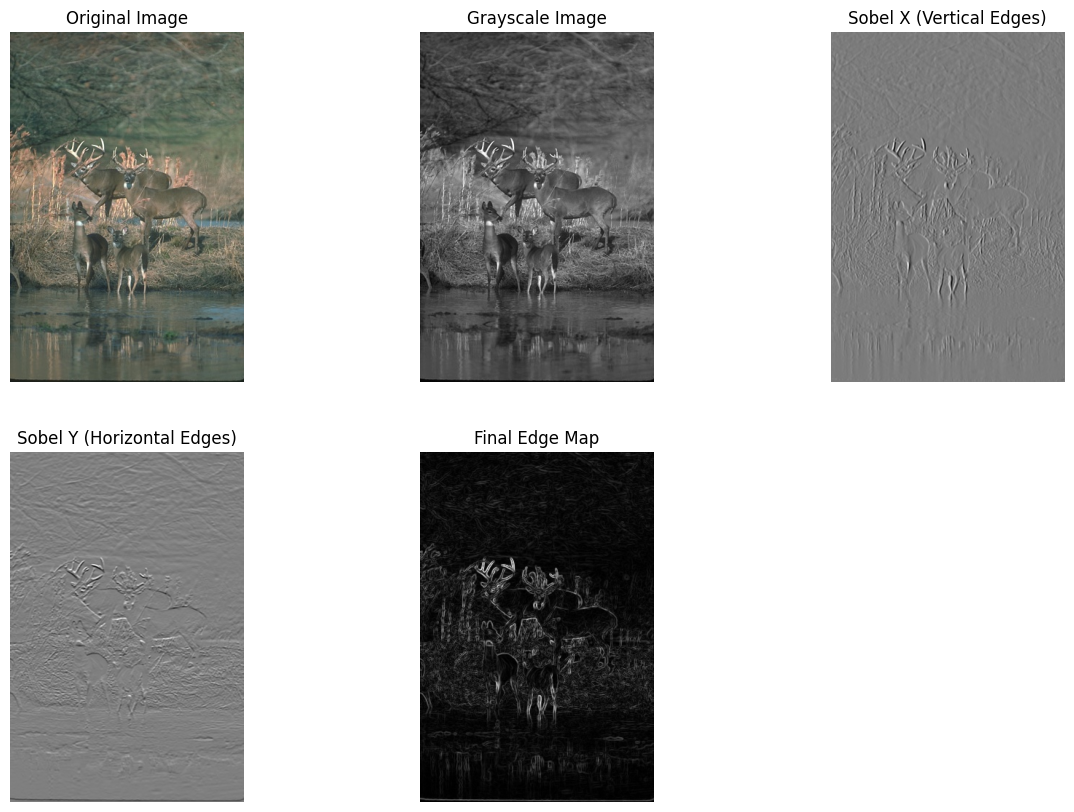

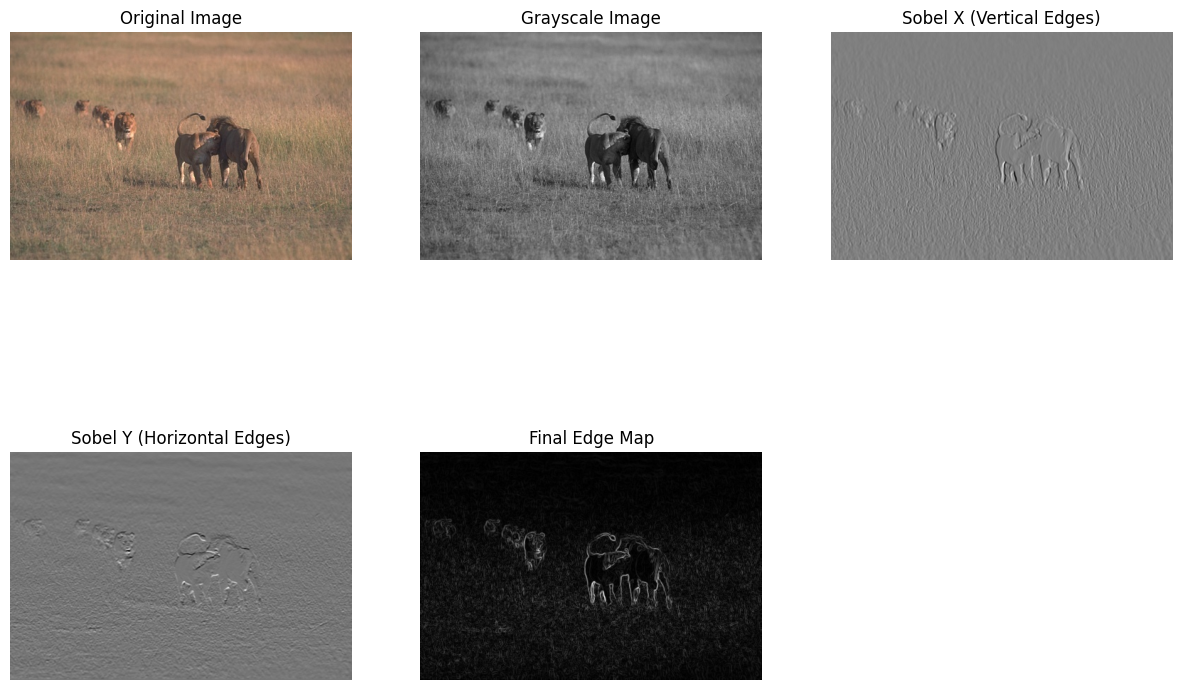

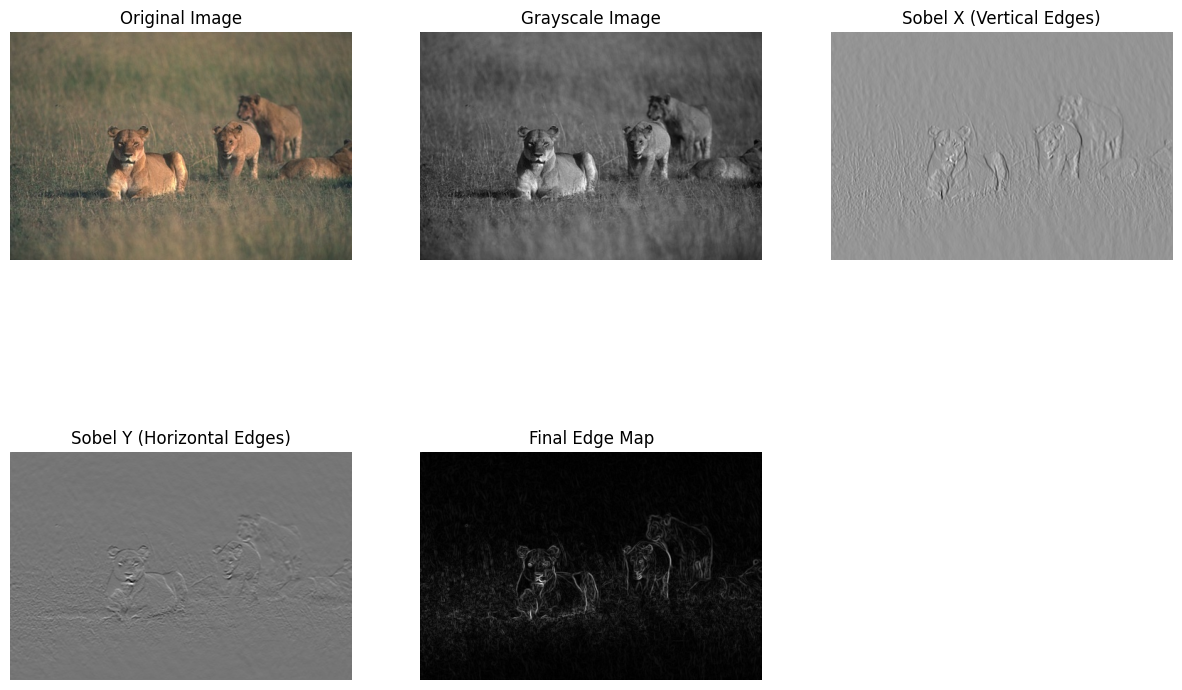

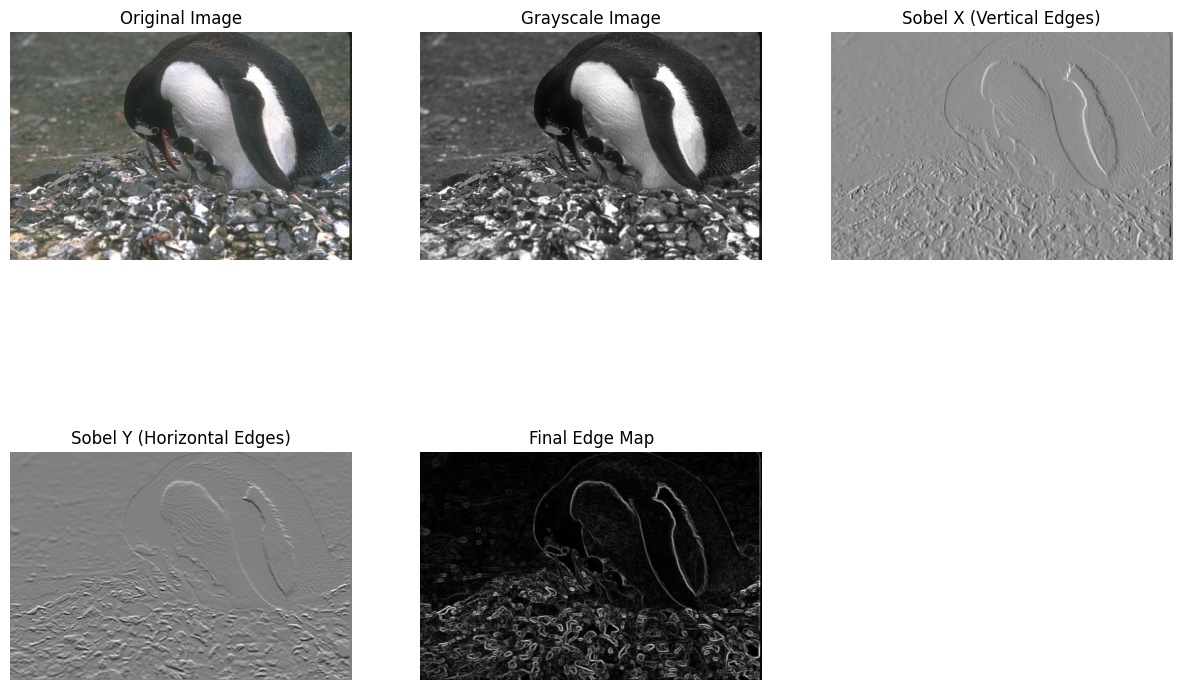

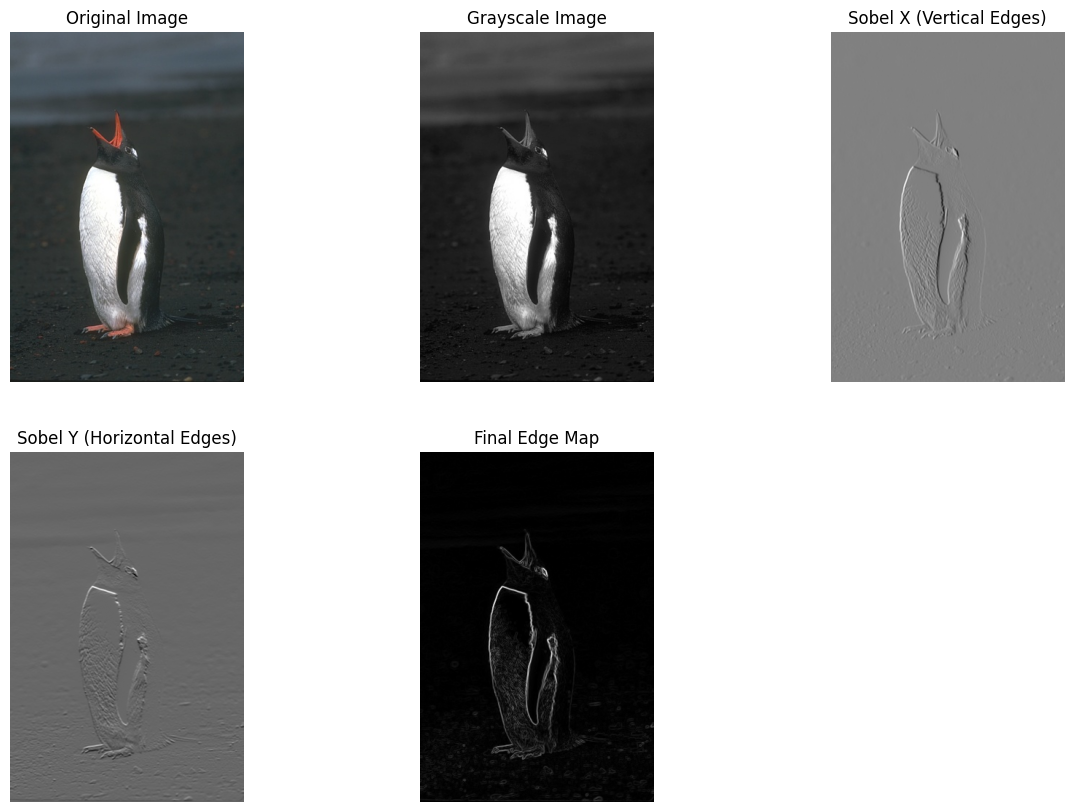

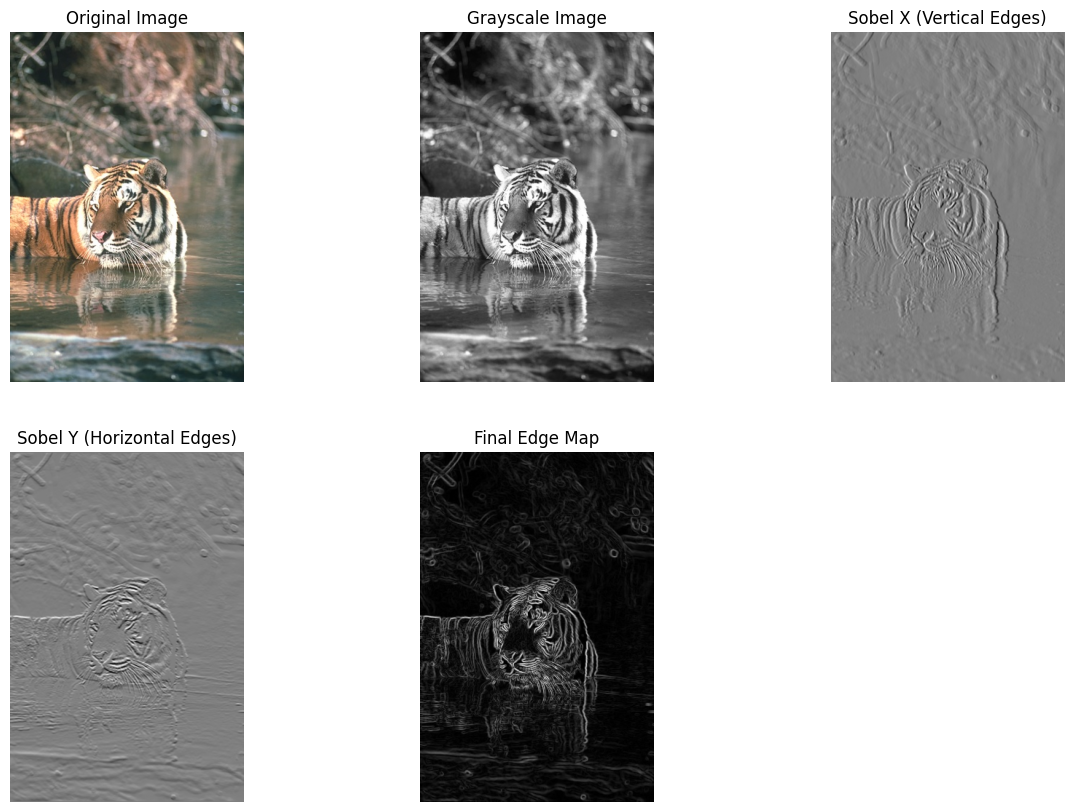

In [7]:

if __name__ == "__main__":
    main()